In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Задание 1

Дано уравнение 
$$
\frac {\partial^2 u}{\partial t^2} = \frac{E}{\rho}\frac {\partial^2 u}{\partial x^2},\ 0\le t \le T,\ 0 \le x\le L 
$$

Со следующими начальными и граничными условиями:
$$
u(0, x) = p(x),\ \frac {\partial u(0, x)}{\partial t} = q(x),\ u(t, 0) = 0,\ u(t, L) = 0
$$

Аппроксимируем вторую производную следующей схемой
$$
\frac {\partial^2 u}{\partial x^2} = \frac {u(x+h) - 2\cdot u(x) + u(x-h)}{h^2}
$$

Аппроксимируем 0й слой по формуле Тейлора:

$$
u_{j}^0 = p_{j}; 
$$

$$
u_{j}^1 = u_{j}^0 + \tau \cdot \frac {\partial u_{j}^0}{\partial t} + \frac {\tau^2}{2} \frac {\partial u_{j}^0}{\partial t^2} = p_{j} + \tau \cdot q_{j} + \frac {\tau^2 E}{2\cdot \rho} \frac {\partial^2 u_j}{\partial x^2} = p_{j} + \tau \cdot q_{j} + \frac {\tau^2 E}{2\cdot h_x^2 \rho} (p_{j+1} - 2\cdot p_j + p_{j-1});
$$

$$
\frac {(u_{j}^{i+1} - 2\cdot u_j^i + u_{j}^{i-1})}{\tau^2} = \frac{E}{\rho} \frac {(u_{j+1}^i - 2\cdot u_j^i + u_{j-1}^i)}{h_x^2}
$$, отсюда получаем:

$$
u_{j}^{i+1} = \frac{\tau^2 E}{\rho h_x^2} {(u_{j+1}^i - 2\cdot u_j^i + u_{j-1}^i)} + 2\cdot u_j^i - u_{j}^{i-1};
$$

Порядок точности второй и по $h_x$, и по  $\tau$. 

In [2]:
# left_cond, right_cond - boundary condition
# p - начальные условия
# q - первая производная по t
# L - (0, L) по х
# N - number of points
def task1(L, p, q, N, tau, T, E, ro):
    # set steps and steps_amount
    Xs = np.linspace(0, L, N)
    h = Xs[1] - Xs[0]
    t_steps = int(T / tau) + 1
    Ts = np.linspace(0, T, t_steps)
    tau = Ts[1] - Ts[0]
    
    size_x = N
    size_t = t_steps
    
    # create matrix for answers
    matrix = np.zeros(shape=(t_steps, N))

    # boundary condition = zeros 
    matrix[0, 1:-1] = [p(Xs[i]) for i in range(1, len(Xs) - 1)]
    
    # coefficient
    coefficient = (tau**2 * E) / (ro * h**2)
    coefs = [coefficient, -2 * coefficient, coefficient]
    
    # first layer   
    matrix[1, 1:-1] = matrix[0, 1:-1] + tau * q(Xs[1:-1]) + sum(coefs[i] * matrix[0, i:size_x-2+i] for i in range(3)) / 2
    
    for t in range(2, t_steps):
        matrix[t, 1:-1] = (sum(coefs[i] * matrix[t - 1, i:len(matrix[0])-2+i] for i in range(3))
                               + 2 * matrix[t - 1, 1:-1] - matrix[t - 2, 1:-1])
        
    
    return matrix

In [3]:
# initial condition
L = 18
delta_u = 0.2
p = lambda x: -4 * delta_u / (L ** 2) * x ** 2  + 4*delta_u / L * x
q = lambda x: 0
ro = 5.9e5
E = 120e9
tau = 1e-4
T = 1e-1
N = 100

In [4]:
x_1 = np.linspace(0, L, N)
matrix1 = task1(L, p, q, N, tau, T, E, ro)

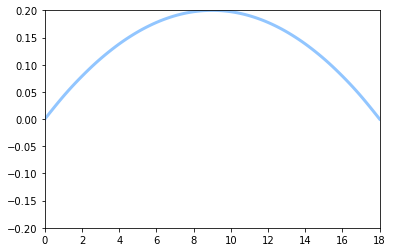

In [5]:
plt.style.use('seaborn-pastel')
fig = plt.figure()
ax = plt.axes(xlim=(0, 18), ylim=(-0.2, 0.2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x_1, matrix1[i % len(matrix1)])
    return line,
 
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=800, interval=10, blit=True)
  
anim.save('lab5_task1.mp4', writer='ffmpeg')

# Задание 2

Дано волновое уравнение
$$
\frac {\partial^2 u}{\partial t^2} = (\frac {\partial^2 u}{\partial x^2} + \frac {\partial^2 u}{\partial y^2}),\ 0 \le t \le T,\ -\frac a 2 \le x \le \frac a 2,\ -\frac b 2 \le y \le \frac b 2
$$

Со следующими начальными и граничными условиями:
$$
u(0, x, y) = p(x, y),\ \frac {\partial u(0, x, y)}{\partial t} = q(x, y),\ u(t, -\frac a 2 , y) = 0,\ u(t, \frac a 2 , y) = 0,\ \frac {\partial u(t, x, -\frac b 2 )}{\partial y} = 0,\ \frac {\partial u(t, x, \frac b 2 )}{\partial y} = 0
$$

Аппроксимируем вторую производную следующей схемой
$$
\frac {\partial^2 u}{\partial x^2} = \frac {u(x+h) - 2\cdot u(x) + u(x-h)}{h^2}
$$

Формулы для расчетов следующие:

$$
u_{j,k}^0 = p_{j,k}; 
$$

$$
u_{j,k}^1 = u_{j,k}^0 + \tau \cdot \frac {\partial u_{j,k}^0}{\partial t} + \frac {\tau^2}{2} \frac {\partial u_{j,k}^0}{\partial t^2} = p_{j, k} + \tau \cdot q_{j, k} + \frac {\tau^2}{2} (\frac {\partial^2 u_{j,k}}{\partial x^2} + \frac {\partial^2 u_{j,k}}{\partial y^2}) = p_{j, k} + \tau \cdot q_{j, k} + \frac {\tau^2}{2} (\frac {p_{j+1, k} - 2\cdot p_{j, k} + p_{j-1, k}} {h_x^2} + \frac {p_{j, k+1} - 2\cdot p_{j, k} + p_{j, k-1}} {h_y^2});
$$

$$
\frac {u^{i+1}_{j,k} - 2\cdot u^i_{j,k} + u^{i-1}_{j,k}}{\tau ^2} = \frac{u^{i}_{j+1, k} - 2\cdot u^i_{j,k} + u^{i}_{j-1, k}}{h_x^2} + \frac{u^{i}_{j, k+1} - 2\cdot u^i_{j,k} + u^{i}_{j, k-1}}{h_y^2}
$$, отсюда получаем:

$$
u^{i+1}_{j,k} = \frac{\tau^2}{h_x^2} (u^{i}_{j+1, k} - 2\cdot u^i_{j,k} + u^{i}_{j-1, k}) + \frac{\tau^2}{h_y^2} (u^{i}_{j, k+1} - 2\cdot u^i_{j,k} + u^{i}_{j, k-1}) + 2\cdot u^i_{j,k} - u^{i-1}_{j,k};
$$

$$
u_{j,K}^i = u_{j,K-1}^i;
$$

$$
u_{j,0}^i = u_{j,1}^i;
$$

In [32]:
def task2(a, b, p, q, n_x, n_y, tau, T, ro):
    # set steps and steps_amount
    Xs = np.linspace(-a/2, a/2, n_x)
    h_x = Xs[1] - Xs[0]
    Ys = np.linspace(-b/2, b/2, n_y)
    h_y = Ys[1] - Ys[0]
    n_t = int(T / tau) + 1
    Ts = np.linspace(0, T, n_t)
    tau = Ts[1] - Ts[0]
    
    # create matrix for answers
    matrix = np.zeros(shape=(n_t, n_x, n_y))
    
    xs, ys = np.meshgrid(Xs, Ys)

    # boundary condition = zeros     
    matrix[0, :, :] = p(xs, ys)
    
    # coefficient
    coefficient = tau**2
    coefs = [coefficient, -2 * coefficient, coefficient]
    
    # first layer    
    matrix[1, 1:-1, 1:-1] = (
            matrix[0, 1:-1, 1:-1] + tau * q(xs[1:-1, 1:-1], ys[1:-1, 1:-1])
            + sum(coefs[i] * matrix[0, i:n_x-2+i, 1:-1] for i in range(3)) / (2 * h_x**2)
            + sum(coefs[i] * matrix[0, 1:-1, i:n_y-2+i] for i in range(3)) / (2 * h_y**2)
        )
    
    matrix[1, 0, 1:-1] = matrix[0, 1, 1:-1]
    matrix[1, -1, 1:-1] = matrix[0,-2, 1:-1]

    

    for t in range(2, n_t):
        matrix[t, 1:-1, 1:-1] = (
            2 * matrix[t - 1, 1:-1, 1:-1] - matrix[t - 2, 1:-1, 1:-1]
            + sum(coefs[i] * matrix[t - 1, i:n_x-2+i, 1:-1] for i in range(3)) / h_x**2
            + sum(coefs[i] * matrix[t - 1, 1:-1, i:n_y-2+i] for i in range(3)) / h_y**2
        )
        matrix[t, 0] = matrix[t, 1]
        matrix[t, -1] = matrix[t, -2]

    return matrix

In [33]:
a = 2
b = 1
p = lambda x, y: np.arctan(np.cos(np.pi*x/a))
q = lambda x, y: np.sin(2*np.pi*x/a)*np.sin(2*np.pi*y/b)

n_x = 100
n_y = 100

tau = 0.001
T = 4

In [34]:
matrix2 = task2(a, b, p, q, n_x, n_y, tau, T, ro)

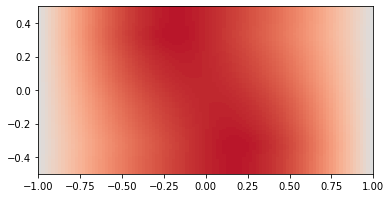

In [37]:
fig = plt.figure()
extent = -a/2, a/2, -b/2, b/2
ims = []

for layer in matrix2:
    ims.append([plt.imshow(layer, animated=True, cmap=plt.cm.coolwarm, vmin=-.84, vmax=.84, extent=extent)])

ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True,
                                repeat_delay=100)

ani.save("lab5_task2.mp4", writer='ffmpeg')